## Wendy Dharmawan - 2206059591
Proyek berikut merupakan proyek yang dibuat untuk course Analisis Data dengan Python, yang membahas data wrangling (mengambil dan membersihkan data), EDA (exploratory data analysis), dan data visualization menggunakan library numpy, pandas, dan matplotlib pada python.

## Menentukan Pertanyaan Bisnis

- Seberapa besar persentase korelasi kadar O3 terhadap suhu kota Guanyuan pada tahun 2013-2017?
- Bagaimana perbandingan kadar SO2, NO2, dan CO antara kota Guanyuan dan Gucheng pada tahun 2013-2017?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

### Memuat tabel kota Guanyuan

In [ ]:
guanyuan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


### Memuat tabel kota Gucheng

In [ ]:
gucheng_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")
gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


### Assessing Data

### Menilai data Guanyuan
#### Menghitung jumlah data yang tidak lengkap

In [ ]:
guanyuan_df.info()
guanyuan_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Terlihat bahwa terdapat beberapa data yang kosong pada column PM2.5, PM10, SO22, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd dan WSPM

#### Menampilkan parameter statistik tabel Guanyuan

In [ ]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Dapat dilihat terdapat banyak data kosong pada kolom rain yang ditandai dengan median dan quartil bawah / atasnya bernilai 0

### Menampilkan jumlah data duplikat pada tabel Guanyuan

In [ ]:
print("Jumlah duplikasi: ", guanyuan_df.duplicated().sum())

Jumlah duplikasi:  0


### Menilai data Gucheng
#### Menghitung jumlah data yang tidak lengkap

In [ ]:
gucheng_df.info()
gucheng_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

Terlihat bahwa terdapat beberapa data yang kosong pada column PM2.5, PM10, SO22, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd dan WSPM

#### Menampilkan parameter statistik tabel Gucheng

In [ ]:
gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


### Menampilkan jumlah data duplikat pada tabel Gucheng

In [ ]:
print("Jumlah duplikasi: ", gucheng_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat data duplikat pada tabel tersebut

Dapat dilihat terdapat banyak data kosong pada kolom rain yang ditandai dengan median dan quartil bawah / atasnya bernilai 0

### Cleaning Data

Karena kedua data berupa time series, maka data yang dianalisa harus utuh sehingga tidak dapat menggunakan drop. Maka untuk mengatasi data yang hilang digunakan metode interpolation

In [ ]:
guanyuan_df.interpolate(method='linear',limit_direction='forward',inplace = True)
gucheng_df.interpolate(method='linear',limit_direction='forward',inplace = True)

Tidak ada data yang duplikat pada kedua tabel. Data yang tidak lengkap hanya terdapat pada kolom rain yang tidak digunakan dalam analisis data.

## Exploratory Data Analysis (EDA)

### Explore ...

Melihat rangkuman parameter statistik menggunakan describe

In [ ]:
guanyuan_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34983,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.897522,109.372349,17.609312,58.139298,1258.327045,54.817142,13.581414,1011.851650,3.120296,0.067383,NaN,1.708577,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.070279,92.340966,23.631529,35.210206,1151.647467,57.199174,11.400426,10.404517,13.690314,0.909798,NaN,1.204180,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,6.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,40.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,149.000000,22.000000,78.270244,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [ ]:
gucheng_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35044.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34905,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Gucheng
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3949,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.074802,119.261567,15.705821,55.851320,1338.100060,58.000001,13.855824,1008.835693,2.600351,0.064374,NaN,1.343667,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.994634,97.533240,23.282583,36.512966,1214.044983,57.171816,11.294955,10.104302,13.790109,0.838142,NaN,1.151055,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-9.000000,0.000000,NaN,0.600000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,100.000000,7.000000,50.000000,985.714286,45.000000,14.800000,1008.500000,3.000000,0.000000,NaN,1.000000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,167.000000,20.000000,79.000000,1680.652174,84.000000,23.500000,1017.000000,15.300000,0.000000,NaN,1.800000,NaN


### Mengelompokkan kadar rata-rata gas O3 kota Gucheng per tahun

In [ ]:
gucheng_df.groupby(by="year")["O3"].mean()

year
2013    55.781492
2014    60.253139
2015    60.779538
2016    59.522883
2017    28.924788
Name: O3, dtype: float64

### Mengelompokkan rata-rata suhu kota Gucheng per tahun

In [ ]:
gucheng_df.groupby(by="year")["TEMP"].mean()

year
2013    15.932823
2014    14.431661
2015    14.027483
2016    13.547228
2017     0.373600
Name: TEMP, dtype: float64

Terlihat bahwa kadar O3 tertinggi ada pada tahun 2015, sedangkan, sedangkan suhu rata-rata tertinggi berada pada tahun 2013. Kadar O3 dan suhu terrendah ada pada tahun 2017

### Mengelompokkan produksi rata-rata Gas SO2, NO2, dan CO Guanyuan berdasarkan tahun

In [ ]:
guanyuan_df.groupby(by="year")["SO2"].mean()

year
2013    21.859392
2014    23.133562
2015    14.073579
2016    11.484517
2017    21.259181
Name: SO2, dtype: float64

In [ ]:
guanyuan_df.groupby(by="year")["NO2"].mean()

year
2013    58.866182
2014    64.343179
2015    54.921958
2016    53.459984
2017    64.920904
Name: NO2, dtype: float64

In [ ]:
guanyuan_df.groupby(by="year")["CO"].mean()

year
2013    1132.745030
2014    1362.357306
2015    1313.704338
2016    1168.169399
2017    1482.768362
Name: CO, dtype: float64

### Mengelompokkan produksi rata-rata Gas SO2, NO2, dan CO Gucheng berdasarkan tahun

In [ ]:
gucheng_df.groupby(by="year")["SO2"].mean()

year
2013    17.508021
2014    21.290103
2015    13.338265
2016    10.204121
2017    20.587924
Name: SO2, dtype: float64

In [ ]:
gucheng_df.groupby(by="year")["NO2"].mean()

year
2013    61.514691
2014    62.424463
2015    49.588271
2016    49.777265
2017    62.319915
Name: NO2, dtype: float64

In [ ]:
gucheng_df.groupby(by="year")["CO"].mean()

year
2013    1341.740264
2014    1442.163242
2015    1323.144977
2016    1170.952869
2017    1804.837571
Name: CO, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

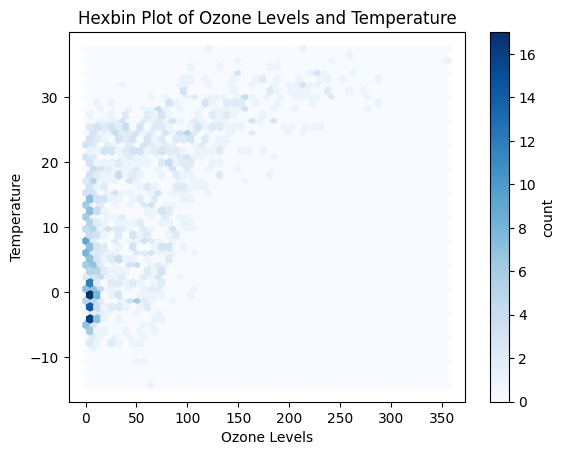

In [ ]:
sampled_data = gucheng_df.sample(n=1000)
plt.hexbin(sampled_data['O3'],sampled_data['TEMP'],  gridsize=50, cmap='Blues')
plt.colorbar(label='count')
plt.title('Hexbin Plot of Ozone Levels and Temperature')
plt.xlabel('Ozone Levels')
plt.ylabel('Temperature')
plt.show()

In [ ]:
temperature = sampled_data['TEMP']
ozone_levels = sampled_data['O3']

correlation_coefficient = np.corrcoef( ozone_levels,temperature)[0, 1]

print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.6300191856439685


Dari scatterplot dan nilai koefisien, maka bisa ditarik kesimpulan bahwa terdapat moderate positive correlation antara kadar Ozon dan Temperatur di kota tersebut. Hal ini berarti dengan adanya peningkatan kadar ozon, maka juga diikuti dengan peningkatan suhu udara dan sebaliknya.

### Pertanyaan 2:

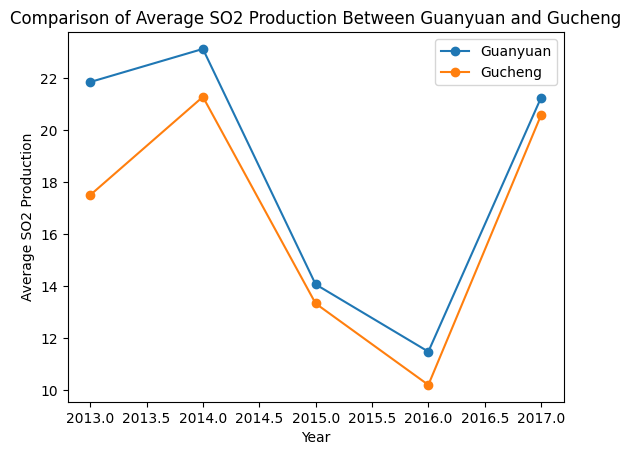

In [ ]:
guanyuan_so2_mean = guanyuan_df.groupby(by="year")["SO2"].mean()
gucheng_so2_mean = gucheng_df.groupby(by="year")["SO2"].mean()

plt.plot(guanyuan_so2_mean.index, guanyuan_so2_mean.values, label='Guanyuan', marker='o')
plt.plot(gucheng_so2_mean.index, gucheng_so2_mean.values, label='Gucheng', marker='o')

plt.xlabel('Year')
plt.ylabel('Average SO2 Production')
plt.title('Comparison of Average SO2 Production Between Guanyuan and Gucheng')
plt.legend()

plt.show()

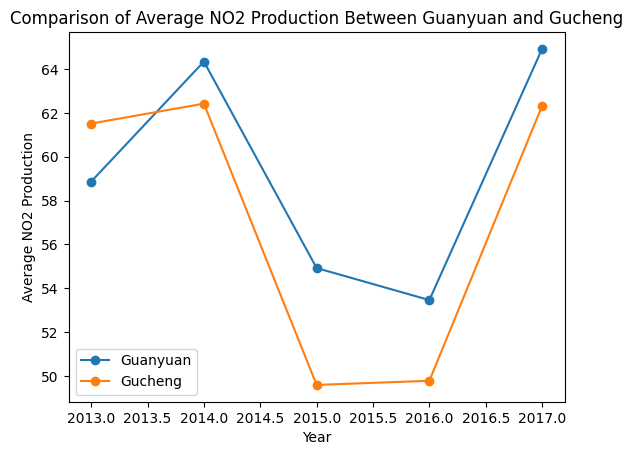

In [ ]:
guanyuan_no2_mean = guanyuan_df.groupby(by="year")["NO2"].mean()
gucheng_no2_mean = gucheng_df.groupby(by="year")["NO2"].mean()

plt.plot(guanyuan_no2_mean.index, guanyuan_no2_mean.values, label='Guanyuan', marker='o')
plt.plot(gucheng_no2_mean.index, gucheng_no2_mean.values, label='Gucheng', marker='o')

plt.xlabel('Year')
plt.ylabel('Average NO2 Production')
plt.title('Comparison of Average NO2 Production Between Guanyuan and Gucheng')
plt.legend()

plt.show()

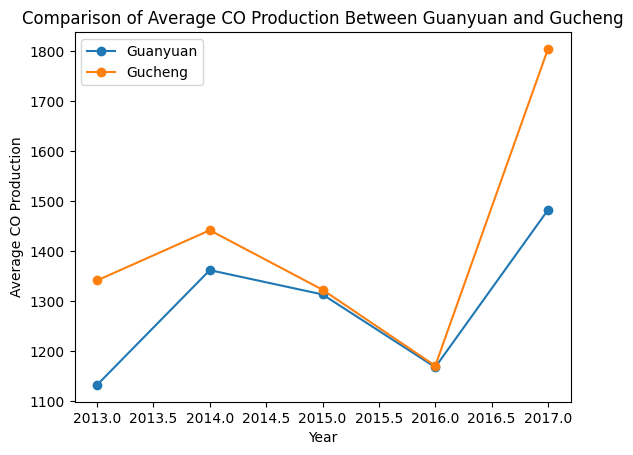

In [ ]:
guanyuan_co_mean = guanyuan_df.groupby(by="year")["CO"].mean()
gucheng_co_mean = gucheng_df.groupby(by="year")["CO"].mean()

plt.plot(guanyuan_co_mean.index, guanyuan_co_mean.values, label='Guanyuan', marker='o')
plt.plot(gucheng_co_mean.index, gucheng_co_mean.values, label='Gucheng', marker='o')

plt.xlabel('Year')
plt.ylabel('Average CO Production')
plt.title('Comparison of Average CO Production Between Guanyuan and Gucheng')
plt.legend()

plt.show()

Dari ketiga grafik, dapat dilihat perbandingan produksi gas polutan rata-rata per tahun dari kedua kota.
Kesimpulan yang bisa ditarik dari ketiga grafik adalah sebagai berikut:

*   Untuk gas SO2, kota Guanyuan memiliki produksi rata-rata yang lebih banyak dibanding Gucheng.
*
Untuk Gas NO2, kota Gucheng memiliki produksi rata-rata yang lebih banyak dibanding Guanyuan pada 2013, namun menurun dan lebih rendah dibanding Guanyuan untuk tahun-tahun selanjutnya  
*   Untuk Gas CO, kota Gucheng memiliki produksi yang lebih banyak dibanding Guanyuan pada tahun 2013-2015, dan menurun pada tahun 2015-2016 hingga mendekat dengan produksi rata-rata Guanyuan, sebelum menjulang tinggi pada tahun 2016

Perbandingan kualitas udara pada kota tersebut dapat dihubungkan pada kandungan gas polutan yang diukur, sehingga dapat menjadi referensi dalam menjaga kualitas udara kedua kota tersebut.


## Conclusion

- Terdapat korelasi sebesar 63% diantara kadar ozon dan suhu udara kota Guanyuan
- Rata-rata kadar gas SO2 dan CO pada 2016 di Guanyuan lebih besar dibanding Gucheng, sedangkan rata-rata kadar NO2 dan CO pada 2013-2015 lebih banyak dibanding Guanyuan